<a href="https://colab.research.google.com/github/louispaulet/Classfication_and_Representation_Learning_course/blob/main/Perceptron_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load data into google drive

In [ ]:
# from google.colab import files
# uploaded = files.upload()

Load numpy for matrix support, matplotlib to plot the data points and boundary layer.
Separate data into classes and extract parameters.

In [ ]:
from numpy import *
import matplotlib.pyplot as plt

#load the data set
data = loadtxt('linear.data')

#separate the input from the output
X = data[:, 0: -1]
Y = data[:, -1]
N, d = X.shape

#separate the positive form the negative
positive_class = X[Y == 1., :]
negative_class = X[Y == -1., :]

Define a function to plot the data here and reuse it later when we have defined a hypothesis.

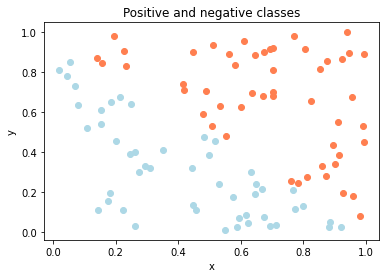

the classes look linearly separable


In [ ]:
#plot of the points
def show_the_data(x, y, more=False, z = 0):
  plt.scatter(x[:, 0], x[:, 1], c='coral')
  plt.scatter(y[:, 0], y[:, 1], c='lightblue')

  if more == True:
    plt.plot(z[:, 0], z[:, 1], c='purple', linestyle='-')

  plt.title('Positive and negative classes')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.show()


show_the_data(positive_class, negative_class)
print("the classes look linearly separable")

Now that we have seen that the data is linearly separable, we need to build the learning loop. We define basic functions to update weights and bias depending on predictions and output the result.

In [ ]:
#learning rate
n = 0.1
#bias
b = 0
#weight vector
w = zeros(d)

epoch = 1

def predict(w, x, b):
  return sign(dot(w, x) + b)

def update_weights(n, x, y, fw):
  return dot(dot(n, (y - fw)), x)

def update_bias(n, y, fw):
  return dot(n, (y - fw))

#main loop : cycle for i epochs
for i in range(0, epoch):
  #for each xi in X set
  for xi in range(0, len(X)):
        
    #predictions
    fw = predict(w, X[xi], b)
    
    #update the weights and bias
    w += update_weights(n, X[xi], Y[xi], fw)
    b += update_bias(n, Y[xi], fw)

  if i%(epoch/5) == 1: #output every 5 loops
    print("weights : " + str(w) + " | bias : " + str(b))

We now use the weight and bias to define the slope and y_intercept of the hypothesis and plot it on a graph

In [ ]:
#math time : https://medium.com/@thomascountz/calculate-the-decision-boundary-of-a-single-perceptron-visualizing-linear-separability-c4d77099ef38
# slope = -(b / w2) / (b / w1)
# y-intercept = -b / w2
# y = (-(b / w2) / (b / w1))x + (-b / w2)

def hyperplane(w, x, b, xpoints):

  w1 = w[0]
  w2 = w[1]
  slope = (-b / w2) / (b / w1)
  y_intercept = -b / w2
  y = slope * xpoints + y_intercept
  xy = stack((xpoints, y), axis = 1)


  return xy

# show_the_data(positive_class, negative_class)
points = linspace(0, 1, 100)
sep_line = hyperplane(w, X, b, points)

# sep_line

We display the data points and add the hyperplane obtained by linear regression. We can observe a perfect fit.

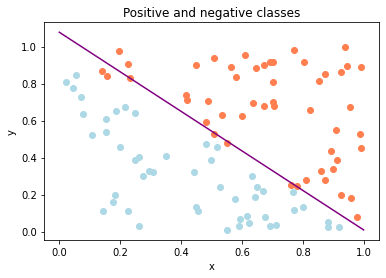

In [ ]:
show_the_data(positive_class, negative_class, True, sep_line)

Accuracy validation : we compute all predictions Ypred from X and compare to Y (true classes)

In [ ]:
def get_accuracy(X, Y, w, b):
  #get list of predictions
  Ypred = []
  for xi in range(0, len(X)):
    Ypred.append(predict(w, X[xi], b))

  # we want to predict either 1 or -1, so 1*1=1 and -1*-1 = 1. 
  # If we multiply the predictions vector and the true Y vector, all negative values are false predictions

  product = (array(Ypred) * Y)
  error_list = Y[product == -1]
  return 1 - len(error_list)/len(Y)

get_accuracy(X, Y, w, b)

0.95

In [ ]:
Functionnal margin : pretty much the same function but this time we choose the minimum value (knowing that there will be only two classes of values)

In [ ]:
def get_functionnal_margin(X, Y, w, b):
    #get list of predictions
  Ypred = []
  for xi in range(0, len(X)):
    Ypred.append(predict(w, X[xi], b))

  # we want to predict either 1 or -1, so 1*1=1 and -1*-1 = 1. 
  # If we multiply the predictions vector and the true Y vector, all negative values are false predictions
  product = (array(Ypred) * Y)
  
  #return the minimal value from the list of Y.Ypred
  return amin(product)

get_functionnal_margin(X, Y, w, b)


-1.0

After one epoch, we can see that the functionnal margin is "-1" and the accuracy is 95%.

In [ ]:
#learning rate
n = 0.1
#bias
b = 0
#weight vector
w = zeros(d)

max_epoch = 100

def fit_model(max_epoch, X, Y, n, b, w, display_w=False, acceptable_accuracy=100):
  #main loop : cycle for i epochs
  for i in range(0, max_epoch):
    #for each xi in X set
    for xi in range(0, len(X)):
          
      #predictions
      fw = predict(w, X[xi], b)
      
      #update the weights and bias
      w += update_weights(n, X[xi], Y[xi], fw)
      b += update_bias(n, Y[xi], fw)

    #compute scores and output stats
    accuracy = get_accuracy(X, Y, w, b)
    functionnal_margin = get_functionnal_margin(X, Y, w, b)
    print("functionnal margin : " + str(functionnal_margin) + " | accuracy : " + str(accuracy*100)+" %")

    if (display_w and i == 0):
      print("w : " + str(w))

    #added the break on functionnal margin to optimize the fit epoch number i
    if (functionnal_margin > 0 or acceptable_accuracy == accuracy):
      break

  #we add 1 to the epoch counter as it starts at 0 (role changes from index value to counter)
  return i+1, X, Y, n, b, w 

i, X, Y, n, b, w = fit_model(max_epoch, X, Y, n, b, w)

print(str(i) + " epochs are needed to fit the model")

functionnal margin : -1.0 | accuracy : 87.0 %
functionnal margin : -1.0 | accuracy : 75.0 %
functionnal margin : -1.0 | accuracy : 68.0 %
functionnal margin : -1.0 | accuracy : 88.0 %
functionnal margin : -1.0 | accuracy : 84.0 %
functionnal margin : -1.0 | accuracy : 84.0 %
functionnal margin : -1.0 | accuracy : 80.0 %
functionnal margin : -1.0 | accuracy : 79.0 %
functionnal margin : -1.0 | accuracy : 78.0 %
functionnal margin : -1.0 | accuracy : 72.0 %
functionnal margin : -1.0 | accuracy : 71.0 %
functionnal margin : -1.0 | accuracy : 87.0 %
functionnal margin : -1.0 | accuracy : 87.0 %
functionnal margin : -1.0 | accuracy : 87.0 %
functionnal margin : -1.0 | accuracy : 87.0 %
functionnal margin : -1.0 | accuracy : 87.0 %
functionnal margin : -1.0 | accuracy : 88.0 %
functionnal margin : -1.0 | accuracy : 71.0 %
functionnal margin : -1.0 | accuracy : 88.0 %
functionnal margin : -1.0 | accuracy : 87.0 %
functionnal margin : -1.0 | accuracy : 87.0 %
functionnal margin : -1.0 | accura

In the following section, we observe no change in needed epochs given extreme changes in the learning rate. However, the weight vector follows exactly the order of n (if n*10^-18,  then w[1]*10^-18 )


In [ ]:
#we reset the hyperparams yet another time 
#learning rate
n = [0.000000000000000001, 0.00001, 0.1, 0.9]

for ni in n:
  max_epoch = 10000
  #bias
  b = 0
  #weight vector
  w = zeros(d)

  print("Testing with learning rate : "+str(ni))
  i, X, Y, n, b, w = fit_model(max_epoch, X, Y, ni, b, w, display_w=True)

  print(str(i) + " epochs are needed to fit the model\n")


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
functionnal margin : -1.0 | accuracy : 88.0 %
functionnal margin : -1.0 | accuracy : 88.0 %
functionnal margin : -1.0 | accuracy : 88.0 %
functionnal margin : -1.0 | accuracy : 88.0 %
functionnal margin : -1.0 | accuracy : 89.0 %
functionnal margin : -1.0 | accuracy : 88.0 %
functionnal margin : -1.0 | accuracy : 87.0 %
functionnal margin : -1.0 | accuracy : 87.0 %
functionnal margin : -1.0 | accuracy : 88.0 %
functionnal margin : -1.0 | accuracy : 88.0 %
functionnal margin : -1.0 | accuracy : 88.0 %
functionnal margin : -1.0 | accuracy : 88.0 %
functionnal margin : -1.0 | accuracy : 88.0 %
functionnal margin : -1.0 | accuracy : 88.0 %
functionnal margin : -1.0 | accuracy : 88.0 %
functionnal margin : -1.0 | accuracy : 88.0 %
functionnal margin : -1.0 | accuracy : 88.0 %
functionnal margin : -1.0 | accuracy : 88.0 %
functionnal margin : -1.0 | accuracy : 88.0 %
functionnal margin : -1.0 | accuracy : 88.0 %
fu

This time, changing the w vector has a huge influence on the learning rate variation. We observe a fast convergence with large learning rates (stats below). The small learning rate combined with a weight vector set to 1s is the most ressource intensive combination as it requires 1656 epochs to fit (compared to less than 3 for the others).

In [ ]:
#we reset the hyperparams yet another time 
#learning rate
n = [0.00001, 0.1, 0.9]

for ni in n:
  max_epoch = 10000
  #bias
  b = 0
  #weight vector
  w = zeros(d) + 1

  print("Testing with learning rate : "+str(ni))
  i, X, Y, n, b, w = fit_model(max_epoch, X, Y, ni, b, w, display_w=True)

  print(str(i) + " epochs are needed to fit the model\n")

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
functionnal margin : -1.0 | accuracy : 84.0 %
functionnal margin : -1.0 | accuracy : 83.0 %
functionnal margin : -1.0 | accuracy : 84.0 %
functionnal margin : -1.0 | accuracy : 83.0 %
functionnal margin : -1.0 | accuracy : 85.0 %
functionnal margin : -1.0 | accuracy : 84.0 %
functionnal margin : -1.0 | accuracy : 85.0 %
functionnal margin : -1.0 | accuracy : 84.0 %
functionnal margin : -1.0 | accuracy : 81.0 %
functionnal margin : -1.0 | accuracy : 81.0 %
functionnal margin : -1.0 | accuracy : 81.0 %
functionnal margin : -1.0 | accuracy : 81.0 %
functionnal margin : -1.0 | accuracy : 85.0 %
functionnal margin : -1.0 | accuracy : 84.0 %
functionnal margin : -1.0 | accuracy : 81.0 %
functionnal margin : -1.0 | accuracy : 84.0 %
functionnal margin : -1.0 | accuracy : 82.0 %
functionnal margin : -1.0 | accuracy : 81.0 %
functionnal margin : -1.0 | accuracy : 81.0 %
functionnal margin : -1.0 | accuracy : 84.0 %
fu

Now we load the non-linear data.

In [ ]:
# from google.colab import files
# uploaded = files.upload()

This time, the data doesn't look perfeclty seprable : some samples for the two classes are mixed into the other group.

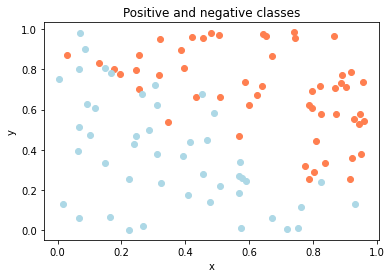

In [ ]:
#load the data set
data = loadtxt('nonlinear.data')

#separate the input from the output
X = data[:, 0: -1]
Y = data[:, -1]
N, d = X.shape

#separate the positive form the negative
positive_class = X[Y == 1., :]
negative_class = X[Y == -1., :]

#plot new data
show_the_data(positive_class, negative_class)

Below, we run the fitting function. It never converges and hits the max_epoch safety limit.

In [ ]:
#we reset the hyperparams yet another time 
#learning rate
n = [0.1]

for ni in n:
  max_epoch = 1000
  #bias
  b = 0
  #weight vector
  w = zeros(d)

  print("Testing with learning rate : "+str(ni))
  i, X, Y, n, b, w = fit_model(max_epoch, X, Y, ni, b, w, display_w=True)

  print(str(i) + " epochs are needed to fit the model\n")

Testing with learning rate : 0.1
functionnal margin : -1.0 | accuracy : 87.0 %
w : [0.41682598 0.50906236]
functionnal margin : -1.0 | accuracy : 75.0 %
functionnal margin : -1.0 | accuracy : 68.0 %
functionnal margin : -1.0 | accuracy : 88.0 %
functionnal margin : -1.0 | accuracy : 84.0 %
functionnal margin : -1.0 | accuracy : 84.0 %
functionnal margin : -1.0 | accuracy : 80.0 %
functionnal margin : -1.0 | accuracy : 79.0 %
functionnal margin : -1.0 | accuracy : 78.0 %
functionnal margin : -1.0 | accuracy : 72.0 %
functionnal margin : -1.0 | accuracy : 71.0 %
functionnal margin : -1.0 | accuracy : 87.0 %
functionnal margin : -1.0 | accuracy : 87.0 %
functionnal margin : -1.0 | accuracy : 87.0 %
functionnal margin : -1.0 | accuracy : 87.0 %
functionnal margin : -1.0 | accuracy : 87.0 %
functionnal margin : -1.0 | accuracy : 88.0 %
functionnal margin : -1.0 | accuracy : 71.0 %
functionnal margin : -1.0 | accuracy : 88.0 %
functionnal margin : -1.0 | accuracy : 87.0 %
functionnal margin 

It seems that the algorithm never converges because the data is not separable by a strait line. We should be using some quadratic function. And even then, we should also lower our expectations as the score will probably never be 100% (it could if we ignore the overfitting problem).

From the previous run, we can set a hard limit of 89% accuracy and stop there. No need to loop until safety kicks in.

In [ ]:
#we reset the hyperparams yet another time 
#learning rate
n = [0.1]

#we set ourselves a hard limit on accuracy for ecological reasons
acceptable_accuracy = 0.89

for ni in n:
  max_epoch = 1000
  #bias
  b = 0
  #weight vector
  w = zeros(d)

  print("Testing with learning rate : "+str(ni))
  i, X, Y, n, b, w = fit_model(max_epoch, X, Y, ni, b, w, display_w=True, acceptable_accuracy=acceptable_accuracy)

  print(str(i) + " epochs are needed to fit the model\n")

Testing with learning rate : 0.1
functionnal margin : -1.0 | accuracy : 87.0 %
w : [0.41682598 0.50906236]
functionnal margin : -1.0 | accuracy : 75.0 %
functionnal margin : -1.0 | accuracy : 68.0 %
functionnal margin : -1.0 | accuracy : 88.0 %
functionnal margin : -1.0 | accuracy : 84.0 %
functionnal margin : -1.0 | accuracy : 84.0 %
functionnal margin : -1.0 | accuracy : 80.0 %
functionnal margin : -1.0 | accuracy : 79.0 %
functionnal margin : -1.0 | accuracy : 78.0 %
functionnal margin : -1.0 | accuracy : 72.0 %
functionnal margin : -1.0 | accuracy : 71.0 %
functionnal margin : -1.0 | accuracy : 87.0 %
functionnal margin : -1.0 | accuracy : 87.0 %
functionnal margin : -1.0 | accuracy : 87.0 %
functionnal margin : -1.0 | accuracy : 87.0 %
functionnal margin : -1.0 | accuracy : 87.0 %
functionnal margin : -1.0 | accuracy : 88.0 %
functionnal margin : -1.0 | accuracy : 71.0 %
functionnal margin : -1.0 | accuracy : 88.0 %
functionnal margin : -1.0 | accuracy : 87.0 %
functionnal margin 

We will finally take a look at the samples relative to the computed hyperplane :

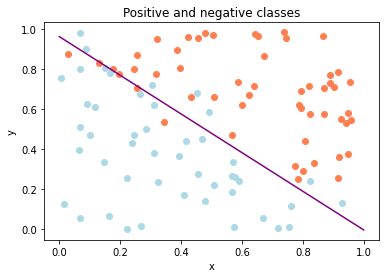

In [ ]:
# show_the_data(positive_class, negative_class)
points = linspace(0, 1, 100)
sep_line = hyperplane(w, X, b, points)
show_the_data(positive_class, negative_class, True, sep_line)

The separation line can make sense as most classes are well organised. The accuracy is not great, and some points are well out of their respective classes.
If we are sorting unimportant stuff , in a hackathon, or just in a layer of a more complex model, it's pretty good. If this is the whole model for sorting cancer yes|no, then it is unacceptable. 89% of the people will receive a correct diagnosis and some of the outliers will be super-dead if we prescribe chemotherapy based on the distance from the hyperplane.